### Pip installs

In [1]:
#!pip3 install torch torchvision torchaudio

### Requeriments txt

In [2]:
#!cd yolov5 && pip install -r requirements.txt

### scout master

In [17]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import shutil

In [4]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in /Users/barbaragdias/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-9-1 Python-3.9.12 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
#cap = cv2.VideoCapture(0)
#while cap.isOpened():
#    ret, frame = cap.read()
#
#    results= model(frame)
#
#    cv2.imshow('YOLO', np.squeeze(results.render()))
#
#    if cv2.waitKey(10) & 0xFF == ord('q'):
#        break
#cap.release()
#cv2.destroyAllWindows()

In [2]:
#model

In [ ]:
#train from scratch

In [2]:
import uuid
import os
import time

In [6]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['messi', 'ronaldo','neymar']
number_imgs = 30

In [7]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/messi.240b22b4-4c36-11ee-ae5e-02054d71b90c.jpg


In [8]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data/images/messi.2b2b2aa8-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b2e04-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b2fe4-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b3886-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b3ae8-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b3cbe-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b3fc0-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b41d2-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b4376-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b44c0-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b4664-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b481c-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b49de-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b4ba0-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b4d58-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b4f10-4c36-11ee-ae5e-02054d71b90c.jpg
data/images/messi.2b2b50dc-4c36-11ee-ae5e-02054d71b90c.j

In [10]:
#!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 4.93 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [4]:
#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [3]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 250 --data dataset.yml --weights yolov5s.pt --workers 2

In [ ]:
# LOAD MODEL

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp8/weights/last.pt', force_reload =True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/barbaragdias/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-9-7 Python-3.9.12 torch-2.0.1 CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [17]:
img = os.path.join('data', 'images')

In [15]:
cap = cv2.VideoCapture("ronaldo.mp4")
while cap.isOpened():
    ret, frame = cap.read()

    results= model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

OpenCV: Couldn't read video stream from file "ronaldo.mp4"


image 1/1: 360x640 1 ronaldo
Speed: 17.6ms pre-process, 90.5ms inference, 1.9ms NMS per image at shape (1, 3, 384, 640)


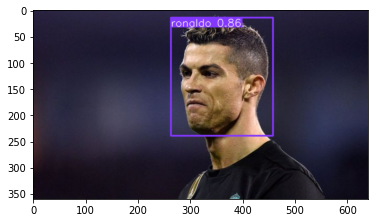

In [6]:
img = '/Users/barbaragdias/Desktop/Scout_Master/data/images/_99542912_gettyimages-902312588.jpg'
results = model(img)
results.print()

%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [28]:
### Detecting images on the video and save labeled frames

def label_frame(player):
    video_path = f"yolov5/{player}.mp4"
    cap = cv2.VideoCapture(video_path)

    model.conf = 0.20
    i = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)

        np.squeeze(results.render())

        #cv2.imshow("ScoutMaster", np.squeeze(results.render())) #this only shows live labeling
        cv2.imwrite(f"frames/{i}.png", frame)

        i+= 1

        if cv2.waitKey(10) & 0xFF == ord("q"):
            break
    cap.release()
    cv2.destroyAllWindows()

In [26]:
def delete_frames(folder_path="frames"):
    # Check if the folder exists
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # Get a list of all files in the folder
        files = os.listdir(folder_path)

        # Loop through the files and delete only files (not subdirectories)
        for file in files:
            file_path = os.path.join(folder_path, file)
            
            # Check if the path is a file (not a subdirectory) before attempting to delete
            if os.path.isfile(file_path):
                try:
                    os.remove(file_path)

                except Exception as e:
                    pass

    else:
        pass

In [29]:
def img_to_video(name="output_video.mp4", fps=30):
    
    image_dir = "frames"
    # Get a list of image files in the directory
    image_files = [os.path.join(image_dir, file) for file in sorted(os.listdir(image_dir)) if file.endswith(('.jpg', '.png', '.jpeg'))]
    image_files = sorted(image_files, key= lambda fname: int(fname.replace("frames/","").split(".")[0]))

    # Check if there are image files to process
    if len(image_files) == 0:
        raise Exception("No image files found in the directory")

    # Load the first image to get dimensions
    first_image = cv2.imread(image_files[0])
    height, width, layers = first_image.shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_video = cv2.VideoWriter(name, fourcc, fps, (width, height))

    # Iterate through the image files and write them to the video
    for image_file in image_files:
        frame = cv2.imread(image_file)
        output_video.write(frame)

    # Release the VideoWriter and close any open windows (if any)
    output_video.release()
    cv2.destroyAllWindows()
    
    #now we just need to delete content from frames
    delete_frames()

print("\n")
print("\n")
print("\n")

print("WELCOME TO SCOUT MASTER")
print("\n")
player = str(input("Choose between Messi, Ronaldo or Neymar"))

label_frame(player=player)
img_to_video()

print("Labeling done, check your folder!")


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
